# Język R
## Postawowe informacje
Język programowania oraz implementujący go system R jest środowiskiem do statystycznej analizy danych. Umożliwia pracę interaktywną i skryptową.
R jest zainstalowany :

 - Na terminalach PCoIP (obraz WIN 10 ICSR System Podstawowy), wygodnym narzędziem tam zaistalowanym jest RStudio.
 - na serwerze jabba.icsr.agh.edu.pl (dostep bezposredni)
 - na JupyterHub
 
Instalacja na Ubuntu:

```apt-get install r-base```

Linki:
 - Strona główna projektu R: http://www.r-project.org/
 - Quick R: http://www.statmethods.net/
 - RStudio: https://www.rstudio.com/

## Interaktywna praca z systemem

Jest kilka możliwości:

 - Uruchamiamy RStudio, które zawiera zintegrowane środowisko do analizy danych w języku R
 - Można też uruchomić konsolę R bezpośrednio poleceniem R
 - W Jupyter tworzymy nowy notatnik z kernelem R

Wbudowana pomoc:

In [1]:
help()

In [2]:
help(plot)

bieżący katalog

In [3]:
getwd()

[1] "/Users/malawski/Dropbox/dydakt/mownit/git-fork/Mownit2018"

zmiana katalogu bieżącego
```
setwd("~")
```

#### Proste obliczenia

In [4]:
2+2

[1] 4

Przypisanie 

więcej o rodzajach przypisania: http://stat.ethz.ch/R-manual/R-patched/library/base/html/assignOps.html

In [5]:
a <- 2

In [6]:
a = 2

Działanie:

In [7]:
a * 2

[1] 4

Listy

Funkcja `c()` - konkatenacja

In [8]:
x = c(1,2,3,4)
y = c(2,4,6,8)
z = x*2
z

[1] 2 4 6 8

In [9]:
x+y 

[1]  3  6  9 12

Funkcje

In [10]:
seq(1,10) 

[1]  1  2  3  4  5  6  7  8  9 10

In [11]:
x = seq(1,10)

In [12]:
sum(x)

[1] 55

In [13]:
sqrt(x)

[1] 1.000000 1.414214 1.732051 2.000000 2.236068 2.449490 2.645751 2.828427
 [9] 3.000000 3.162278

## Import i przekształcanie danych

R umożliwia wczytywanie danych z baz danych i plików w różnych formatach.

Przykład: import z pliku CSV.

Do importu służy funkcja read.

Przykładowy plik: [data1.txt](https://www.icsr.agh.edu.pl/~malawski/dydakt/mownit/R/data1.txt)

Kolumny t1 i t2 zawierają wyniki "pomiarów" czasu dla 2 "algorytmów".

In [14]:
results = read.csv("data1.txt")

Zaimportowane dane są w postaci tabeli (data frame).

In [15]:
results

n,t1,t2
<int>,<dbl>,<dbl>
1,1.1,2.3
2,2.0,4.1
3,2.8,6.0
4,4.2,8.2
5,5.1,9.9
6,5.9,12.1
7,6.7,14.1
8,8.0,15.9
9,9.1,18.1


Pobranie kolumny jako wektor kolumnowy:

In [16]:
results[1]

n
<int>
1
2
3
4
5
6
7
8
9


Pobranie kolumny jako lista:

In [17]:
results[[1]]

[1]  1  2  3  4  5  6  7  8  9 10

pobranie kolumny po nazwie:

In [18]:
results["t1"]

t1
<dbl>
1.1
2.0
2.8
4.2
5.1
5.9
6.7
8.0
9.1


Pobranie wiersza lub wierszy:

In [19]:
results[2,]

,n,t1,t2
,<int>,<dbl>,<dbl>
2,2,2,4.1


In [20]:
results[c(2,4,6),]

,n,t1,t2
,<int>,<dbl>,<dbl>
2,2,2.0,4.1
4,4,4.2,8.2
6,6,5.9,12.1


attach (dodanie tabeli do kontekstu) pozwala na pojedyncze odwołania do kolumn bez odwoływania sie do calej tabeli:

In [21]:
attach(results)
t1

[1]  1.1  2.0  2.8  4.2  5.1  5.9  6.7  8.0  9.1 10.1

In [22]:
t2

[1]  2.3  4.1  6.0  8.2  9.9 12.1 14.1 15.9 18.1 19.9

In [23]:
n

[1]  1  2  3  4  5  6  7  8  9 10

### Rysowanie wykresów

Uzywamy pakietu ggplot2

W przypadku własnej instalacji na początku może być potrzeba doinstalowania pakietu:

```install.packages("ggplot2")```

In [24]:
library("ggplot2")

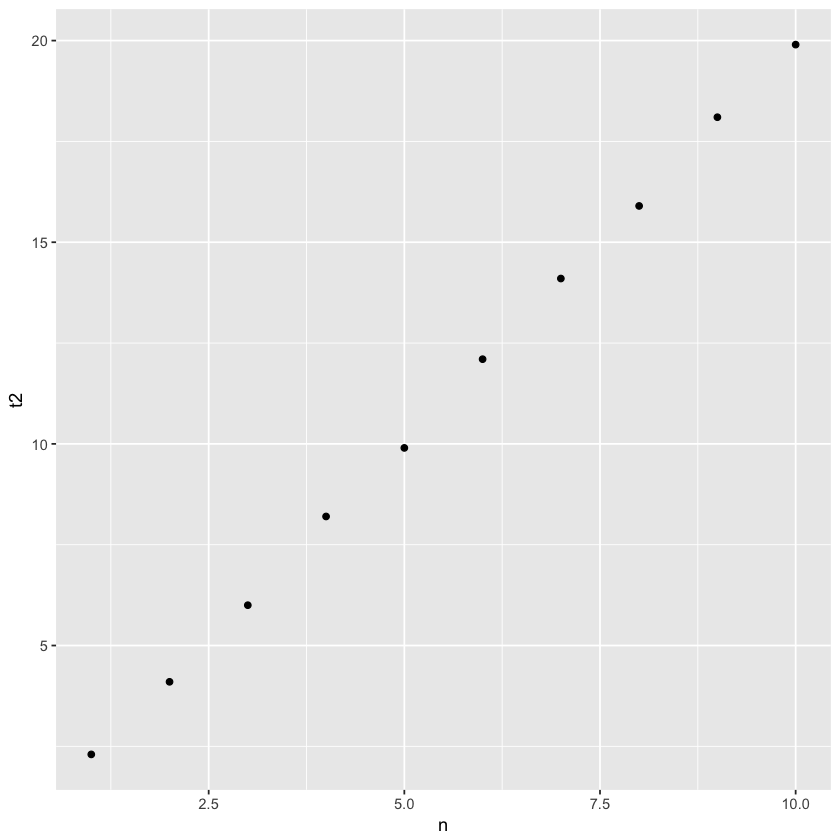

In [25]:
ggplot(results,aes(n,t2)) + geom_point()

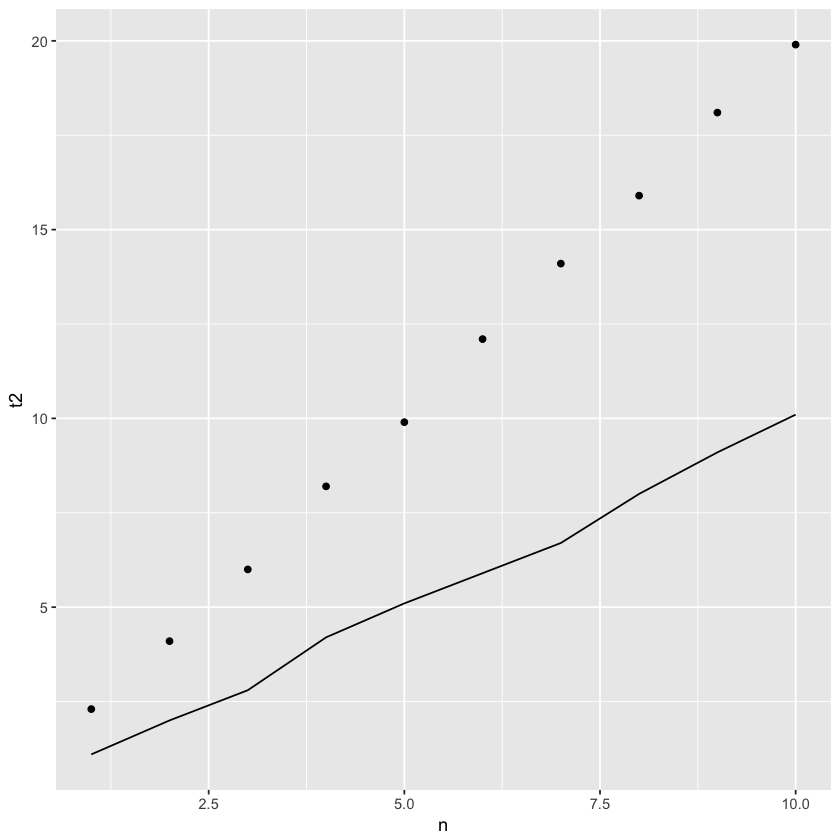

In [26]:
last_plot() + geom_line(data=results, aes(n,t1))

## Przykład analizy danych

Przetwarzanie danych w tabeli

Dane w pliku [data2.txt](https://www.icsr.agh.edu.pl/~malawski/dydakt/mownit/R/data2.txt) mają postać tabeli faktów, w której wiersze są wynikami pomiarów. 

Przykładowo, zmierzono czas (time) dla różnych algorytmów (t1, t2).

Kolumna `alg` jest typu `factorial` - jest to typ wyliczeniowy w R.

In [27]:
results = read.csv("data2.txt")

results

n,alg,time,error
<int>,<fct>,<dbl>,<dbl>
1,t1,1.010572,0.010572148
2,t1,1.981689,-0.018310993
3,t1,3.066268,0.066268043
4,t1,4.060221,0.060220570
5,t1,5.029502,0.029502051
6,t1,6.045928,0.045927536
7,t1,6.957461,-0.042538559
8,t1,8.009891,0.009891313
9,t1,9.053959,0.053959370


Dodanie nowej kolumny:

In [28]:
results$speed = results$n / results$time

results

n,alg,time,error,speed
<int>,<fct>,<dbl>,<dbl>,<dbl>
1,t1,1.010572,0.010572148,0.9895385
2,t1,1.981689,-0.018310993,1.0092401
3,t1,3.066268,0.066268043,0.9783880
4,t1,4.060221,0.060220570,0.9851682
5,t1,5.029502,0.029502051,0.9941342
6,t1,6.045928,0.045927536,0.9924036
7,t1,6.957461,-0.042538559,1.0061141
8,t1,8.009891,0.009891313,0.9987651
9,t1,9.053959,0.053959370,0.9940402


Grupowanie (agregacja)

Przyklad: zastosowanie funkcji FUN (tutaj: mean czyli obliczającej średnią) do wszystkich wartosci time dla takich samych n i alg:

In [29]:
avg_results = aggregate( time ~ n:alg, data=results, FUN=mean)

avg_results

n,alg,time
<int>,<fct>,<dbl>
1,t1,0.9990494
2,t1,2.0152520
3,t1,2.9867132
4,t1,3.9869472
5,t1,4.9716765
6,t1,6.0127196
7,t1,6.9400184
8,t1,8.0313431
9,t1,8.9836556


Dołączenie kolumny z obliczonym odchyleniem standardowym (sd) do tabeli:

In [30]:
avg_results$sd = aggregate( time ~ n:alg, data=results, FUN=sd)$time

Agregacja kilku wielkości:

In [31]:
avg_results = aggregate( cbind(time,speed) ~ n:alg, data=results, FUN=mean) 

Filtrowanie danych:

In [32]:
avg_results[avg_results$alg=="t1",]

,n,alg,time,speed
,<int>,<fct>,<dbl>,<dbl>
1,1,t1,0.9990494,1.0028054
2,2,t1,2.0152520,0.9928574
3,3,t1,2.9867132,1.0049406
4,4,t1,3.9869472,1.0036074
5,5,t1,4.9716765,1.0058149
6,6,t1,6.0127196,0.9979343
7,7,t1,6.9400184,1.0086470
8,8,t1,8.0313431,0.9961325
9,9,t1,8.9836556,1.0018430


Rysowanie wykresów.

Wykres time w funkcji n:

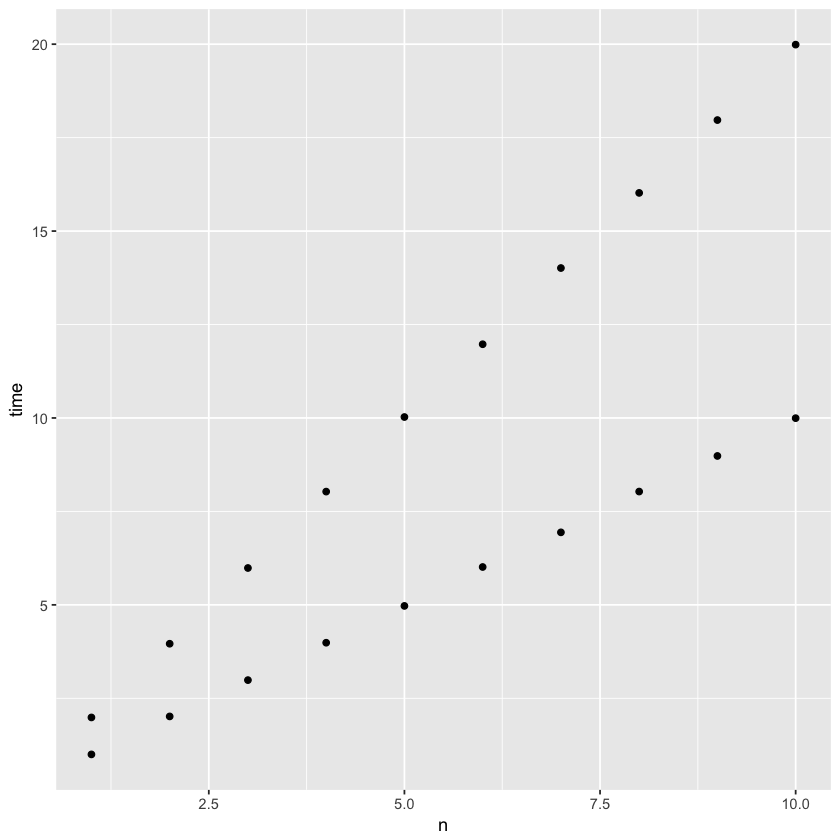

In [33]:
ggplot(avg_results, aes(n,time)) + geom_point()

Przykład skryptu rysującego wykres. Skrypt data2_plot.R uruchamiamy poleceniem:
W wersji okienkowej: Plik -> Otworz skrypt i potem "uruchom linijke lub zaznaczenie"
albo w konsoli:

In [34]:
source("data2_plot.R")

Saving 7 x 7 in image



w bashu za pomoca polecenia:

```Rscript data2_plot.R```

W wyniku powstaje plik [myplot.png](myplot.png)

## Przyklad aproksymacji wielomianami

Generujemy ciąg punktów, który będziemy aproksymować

In [35]:
x = c(32,64,96,118,126,144,152.5,158)  
y = c(99.5,104.8,108.5,100,86,64,35.3,15)
mydata = data.frame(x,y)
mydata

x,y
<dbl>,<dbl>
32.0,99.5
64.0,104.8
96.0,108.5
118.0,100.0
126.0,86.0
144.0,64.0
152.5,35.3
158.0,15.0


Fitujemy zwyklym wielomianem stopnia 3

In [36]:
fit = lm(y ~ poly(x, 3, raw=TRUE), data=mydata)

Możemy wyświetlić współczynniki wielomianu:

In [37]:
fit 


Call:
lm(formula = y ~ poly(x, 3, raw = TRUE), data = mydata)

Coefficients:
            (Intercept)  poly(x, 3, raw = TRUE)1  poly(x, 3, raw = TRUE)2  
              1.269e+02               -1.626e+00                2.910e-02  
poly(x, 3, raw = TRUE)3  
             -1.468e-04  


Rysujemy wykres punktów:

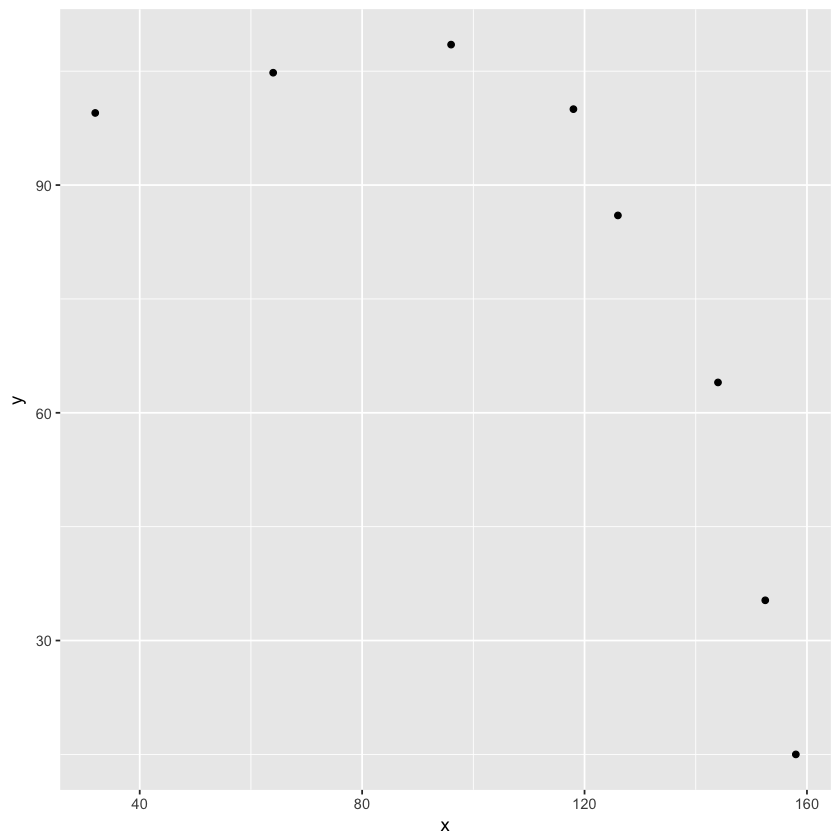

In [38]:
ggplot(mydata,aes(x,y)) + geom_point()

Generujemy gestą listę punktów dla wyliczenia wartości wielomianu aproksymujacego

In [39]:
 newdata = data.frame(x = seq(30,160, length.out=250))

Dodajemy do wykresu krzywą wielomianu

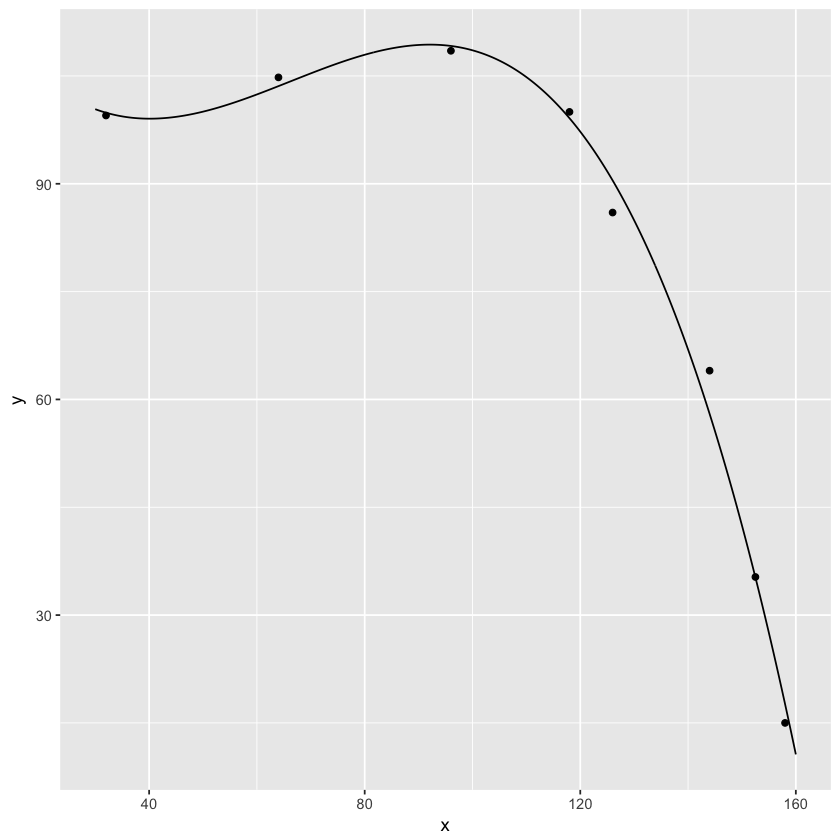

In [40]:
newdata$y = predict(fit, newdata)
last_plot() + geom_line(data=newdata, aes(x,y))

[Multiple Regression in R](http://www.statmethods.net/stats/regression.html)

## Zadanie

Za pomocą języka R przeanalizować dowolne dane z poprzednich laboratoriów. Elementy obowiązkowe:

1. W jednej tabeli języka R należy umieścić wyniki dwóch różnych eksperymentów (t.j. czas działania dwóch różnych funkcji) dla różnych parametrów (t.j. rozmiarów wektora(macierzy)).
2. Tabela powinna zawierać dane z 10-krotnego uruchomienia tego samego eksperymentu dla tych samych parametrów (dla każdego takiego zestawu)
3. Należy przedstawić wykresy średnich czasów obliczenia wybranych funkcji w zależności od rozmiaru wektora (macierzy)
4. Wykresy powinny zawierać informację o odchyleniu standardowym dla uzyskanych wyników. Słupki błędów można narysować korzystając z funkcji geom_errorbar pakietu ggplot2 .
5. Użyć aproksymacji wielomianowej dostępnej w języku R do znalezienia odpowiednich wielomianów, które najlepiej pasują do wyniokw każdego z algorytmów. Dodać wykresy uzyskanych wielomianow do wykresu.
6. Dopasować krzywą wykładniczą do liczby zakażonych koronawirusem w Polsce. Przykładowe źródło danych w [GoogleDoc](https://docs.google.com/spreadsheets/d/1ZIdpVF5AfbkFvGxey92RQLjRVWF8_oWN5-hSbFDL8g0/htmlview#). Jak zmieniają się krzywe, gdy do aproksymacji użyjemy danych z ostatnich 7 lub 14 dni, a jak gdy użyjemy danych z pierwszych 7 lub 14 dni. Porównać na wykresach.